# Logistic Regression Tutorial

This notebook explains the basic concept of Logistic Regression using a simple example.
We will learn:

   ### 1. Why Use Logistic Regression Instead of Linear Regression?
   ### 2. From Linear Function to Sigmoid Function
   ### 3. Maximum Likelihood and Optimization
   ### 4. Implementing Logistic Regression in Python
   ### 5. Model Evaluation

## 1.Why Use Logistic Regression Instead of Linear Regression?

Logistic Regression is a statistical method used to predict categorical outcome — situations where the result is discrete, such as yes/no, true/false, or 1/0.
It is one of the most common algorithms for classification problems, where we want to estimate the probability that an observation belongs to a particular class.
For example:

Will a student pass or fail an exam?

Will a customer buy a product or not?

Is an email spam or not?

Unlike Linear Regression, which predicts continuous numerical values that can take any range (including negative numbers or values greater than one), logistic regression is designed to handle cases where the output must be limited between0 and 1.

This makes it especially useful in real-world problems where the goal is not to predict a number, but to classify an observation into one of two categories.
To achieve this, Logistic Regression uses the sigmoid (logistic) function, which transforms the output of a linear equation into a value between 0 and 1.
This transformation allows the result to be interpreted as a probability, making Logistic Regression a natural choice for binary classification tasks.

## 2. From Linear Function to Sigmoid Function

The logistic regression model starts with a linear equation: 

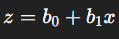

But instead of predicting 
𝑧 directly, we pass it through the sigmoid function, which converts any number into a range between 0 and 1:

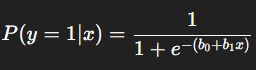

This represents the probability that the outcome 
𝑦 equals 1 (for example, “pass” or “success”).

### 3. Maximum Likelihood and Optimization


The coefficients 𝑏0 and 𝑏1 are not determined using the least squares method

(as in linear regression) but by Maximum Likelihood Estimation (MLE).

This approach finds the parameters that make the observed outcomes most probable.

The likelihood function is defined as:


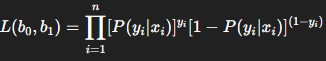

To simplify the computation, we take the natural logarithm of this expression,
resulting in the log-likelihood function:

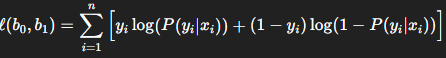

By taking derivatives of this function, we can calculate the gradient and Hessian matrices,
which help us find the parameter values that maximize the log-likelihood.

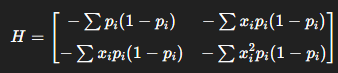

This matrix is negative definite, which means the log-likelihood function is concave —
so it has only one maximum point that Newton’s method will converge to.

This shows that the curvature (second derivative) depends on both the input values and the predicted probabilities.

In logistic regression, this Hessian also appears in the Iteratively Reweighted Least Squares (IRLS) algorithm,
where each observation is assigned a weight:

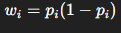

so the Hessian can be written more compactly as:



Here:
   
    𝑋: input feature matrix

    𝑊: diagonal matrix with weights 𝑤𝑖

This formulation allows the algorithm to efficiently update parameters during optimization.

The Hessian matrix represents the second derivatives of the log-likelihood function.
It shows how the slope (gradient) changes — in other words, the curvature of the function.

The partial derivatives (gradients) of the log-likelihood function tell us how to adjust the parameters 𝑏0 and 𝑏1 to improve the model.
They are calculated as:

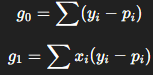

These gradients indicate:

    how much to change the intercept (𝑏0), and

    how much to change the slope (𝑏1).

They form the direction of learning — the vector that points toward the maximum likelihood.

In practice, these values are used inside optimization algorithms such as Gradient Ascent or Newton-Raphson to iteratively update the parameters until convergence.

where 𝑏0 and 𝑏1 are the parameters estimated by maximizing the log-likelihood function.

#### ⚙️ Importing Required Libraries

Before building the logistic regression model, we need to import the necessary Python libraries:

    pandas → for handling and analyzing data in table (DataFrame) format

    numpy → for mathematical and numerical operations

    matplotlib.pyplot → for creating visualizations and plots

    train_test_split → for dividing the dataset into training and testing sets

    LogisticRegression → for building and training the logistic regression model 
    
    accuracy_score, confusion_matrix, classification_report → for evaluating model performance

In [24]:
import pandas as pd 
import numpy as np            
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


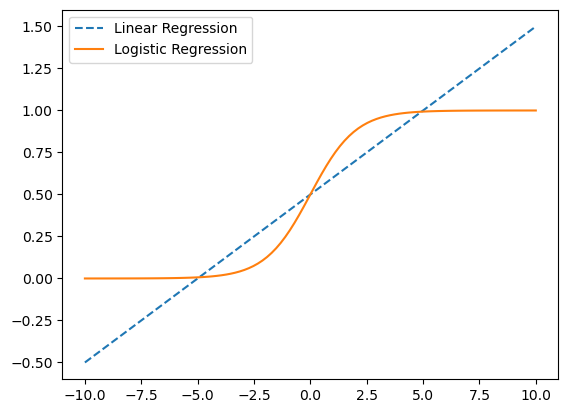

In [23]:
x = np.linspace(-10, 10, 100)   # Generates 100 evenly spaced values between -10 and 10
y_linear = 0.1 * x + 0.5        # A simple linear equation without restrictions
y_logistic = 1 / (1 + np.exp(-x))  # Sigmoid function, compresses values between 0 and 1
plt.plot(x, y_linear, '--', label='Linear Regression')     # Dashed line for linear regression
plt.plot(x, y_logistic, label='Logistic Regression')       # Smooth S-shaped curve for logistic regression
plt.legend() # Adding a legend to distinguish the two lines
plt.show() # Displaying the graph

## 4. Implementing Logistic Regression in Python

#### 📊 Creating the Dataset

In this example, we create a simple dataset that shows the relationship between study hours and whether a student passed or failed an exam.

    study_hours → number of hours each student studied

    passed → exam result (1 = Passed, 0 = Failed)

The data is stored in a pandas DataFrame for easy handling and analysis.

In [25]:
data = {
    'study_hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'passed': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
print("Dataset:")
print(df)

Dataset:
   study_hours  passed
0            1       0
1            2       0
2            3       0
3            4       0
4            5       1
5            6       1
6            7       1
7            8       1
8            9       1
9           10       1


#### Defining Features and Target

We separate the dataset into:

    X (features): the independent variable(s) used to make predictions — here, it is study_hours.

    y (target): the dependent variable we want to predict — here, it is passed.

In [26]:
x = df[['study_hours']]
y = df['passed']

#### Splitting the Data

We split the dataset into training and testing parts to evaluate the model’s performance on unseen data.

    Training set (70%) → used to train the model

    Test set (30%) → used to check how well the model generalizes

    random_state=42 → ensures reproducibility of results

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### Checking the Data Split
After splitting the dataset, we print the number of samples in each part to confirm that the data was divided correctly.

In [7]:
print("\nTraining set size:", len(x_train))
print("Test set size:", len(x_test))


Training set size: 7
Test set size: 3


####  Training the Model

We now create and train a Logistic Regression model using the training data.

In [8]:
model = LogisticRegression() #creates the model
model.fit(x_train, y_train) #trains the model to learn the relationship between study hours and passing results

LogisticRegression()

Before computing the gradients, we first calculate some useful totals from the data:

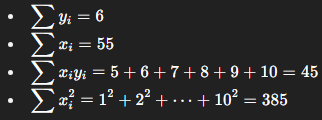

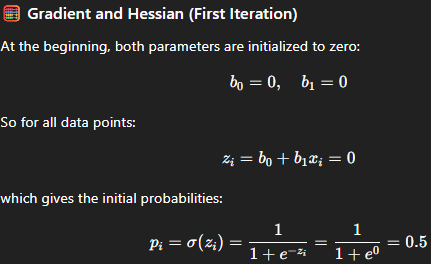

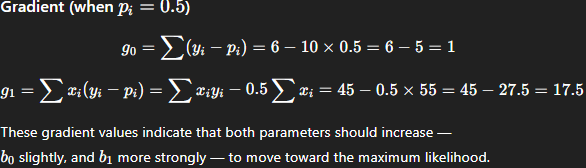

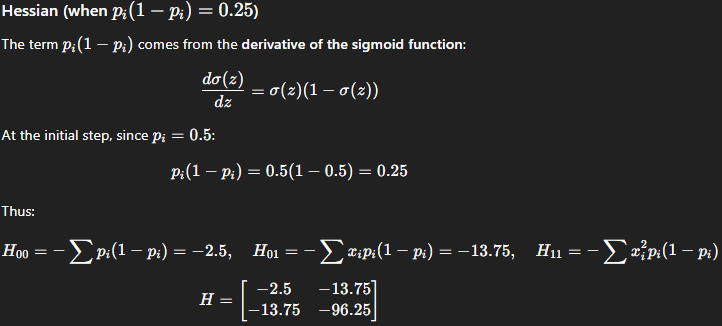

    The gradient tells the direction in which the log-likelihood increases.

    The Hessian tells how sharply it curves in that direction (the rate of change of the gradient).

    Because the Hessian is negative definite, the log-likelihood function is concave,
    meaning there is only one maximum point — the optimal solution that Newton’s 
    method will converge to.

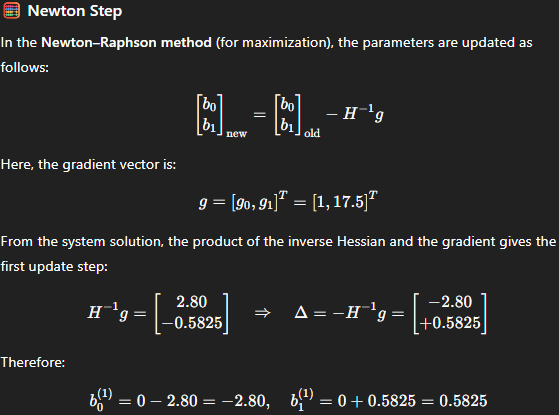

Even in the very first Newton step,

    𝑏0 moves in the negative direction,
    
    𝑏1moves in the positive direction — toward the correct slope.

Subsequent Newton/IRLS iterations will quickly refine these values until convergence.

In [17]:
# Making Predictions
#After training the model, we use it to make predictions on the test data.
#model.predict(x_test) → uses the trained model to predict whether each student in the test set passed (1) or failed (0).
#The predicted results are stored in the variable y_pred.
y_pred = model.predict(x_test)

In [14]:
b0 = model.intercept_[0]
b1 = model.coef_[0][0]
x_star = -b0 / b1
print(f"b0 = {b0:.4f}, b1 = {b1:.4f}")
print(f"Decision boundary (x*): {x_star:.2f}")


b0 = -4.7556, b1 = 1.0260
Decision boundary (x*): 4.64


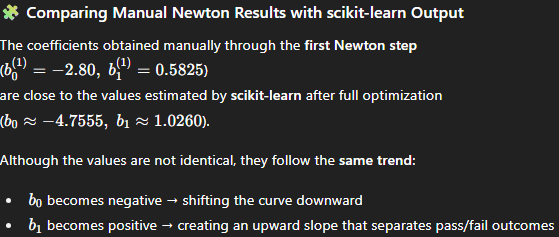

🔍 Why the Difference Exists

The small difference between our manual results and the scikit-learn output occurs because:

Number of Iterations

    In our manual calculation, we only performed the first Newton step.

    scikit-learn continues this process for many iterations (by default up to 100)
    until the gradient becomes nearly zero and the parameters fully converge.

Precision and Optimization Algorithm

    scikit-learn uses an advanced numerical solver (usually LBFGS or Newton-CG)
    that adjusts the step size more precisely.

    This ensures the algorithm reaches the exact Maximum Likelihood Estimate (MLE).

Floating-Point Precision

    Manual calculations are simplified (rounded values, fewer decimal places),
    whereas scikit-learn operates with high-precision floating-point arithmetic.

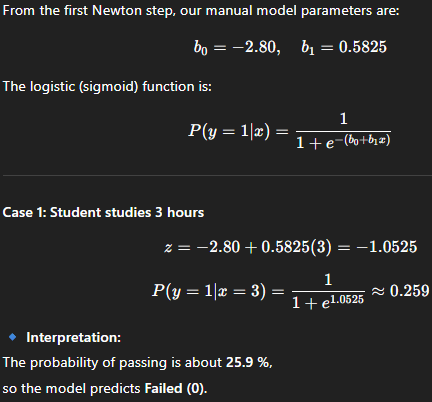

In [30]:
# MANUAL TEST
manual_hour = 3  # you can change this value to test different hours
prediction = model.predict([[manual_hour]])
print("Study Hours:", manual_hour)
print("Predicted Result:", "Passed ✅" if prediction[0] == 1 else "Failed ❌")

Study Hours: 3
Predicted Result: Failed ❌


C:\Users\muham\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


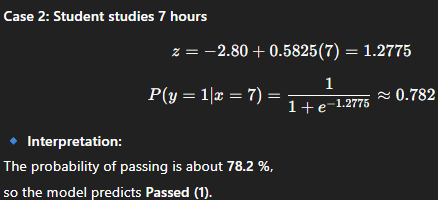

In [31]:
# MANUAL TEST
manual_hour = 7  # you can change this value to test different hours
prediction = model.predict([[manual_hour]])
print("Study Hours:", manual_hour)
print("Predicted Result:", "Passed ✅" if prediction[0] == 1 else "Failed ❌")

Study Hours: 7
Predicted Result: Passed ✅


C:\Users\muham\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


C:\Users\muham\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


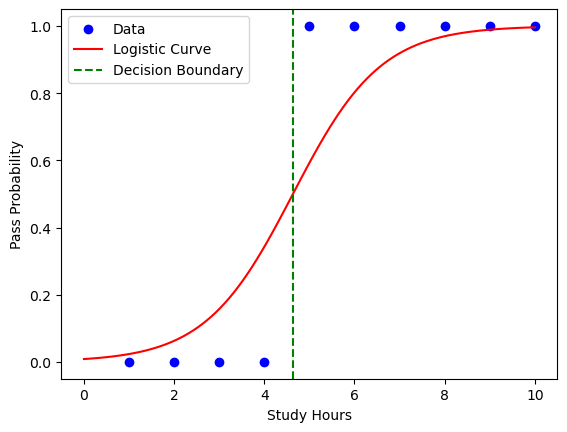

In [38]:
plt.scatter(x, y, color='blue', label='Data')
x_range = np.linspace(0, 10, 100)
y_prob = model.predict_proba(x_range.reshape(-1, 1))[:,1]
plt.plot(x_range, y_prob, color='red', label='Logistic Curve')
plt.axvline(x=4.64, color='green', linestyle='--', label='Decision Boundary')
plt.xlabel('Study Hours')
plt.ylabel('Pass Probability')
plt.legend()
plt.show()


## 5. Model Evaluation


After training the logistic regression model, we compare the actual test results with the predicted results to understand how well the model performs.

In [33]:
#Comparing Actual vs Predicted Values
#We display the actual test results and the predicted results side by side to visually compare the model’s performance.
print("\nActual Test Values:", list(y_test))
print("Predicted Values:", list(y_pred))


Actual Test Values: [1, 0, 1]
Predicted Values: [1, 0, 1]


The model correctly predicts all outcomes in the test data.

In [34]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Accuracy Score: 1.0


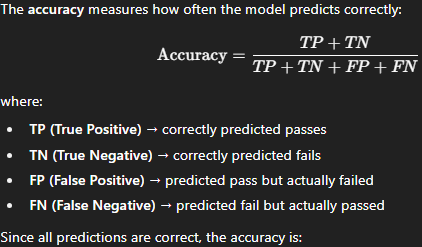

In [35]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[1 0]
 [0 2]]


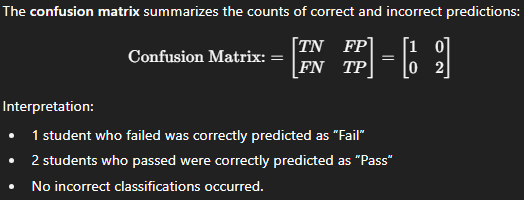

In [36]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



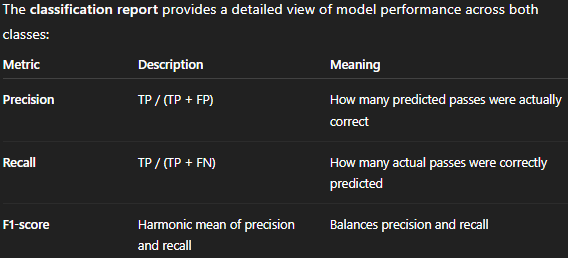


The model has learned that as study hours increase, the probability of passing also increases.